<a href="https://colab.research.google.com/github/JuanCervigon/master2025/blob/main/Cluster_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis cluster jerárquico

Partimos de un conjunto de datos $x$ de observaciones (filas) y variables (columnas) de dimensión n x d

Se calculan las distancias entre las observaciones

Normalmente se considera la distancia euclidea. La agrupación de las observaciones se realizará en función de la distancia entre las observaciones, de forma que las observaciones que estén próximas pertenerán al mismo cluster y las observaciones que estén lejos pertenecerán a distintos clusters

Por lo tanto es importante homogeneizar las escalas de las variables. Por ejemplo se pueden estandarizar las variables

Se aplica un procedimiento iterativo de ir agrupando las observaciones más cercanas para construir los clusters

Con esta técnica se agrupan sucesivamente las observaciones en función del grado de similitud o de distancia.

En primer lugar se define el grado de similitud entre todas las observaciones y se crea una matriz de similitudes (n x n) donde se cruzan todas las observaciones. Normalmente se utiliza la distancia euclidea para definie el grado de similitud entre dos observaciones. Cuanto más pequña sea la distancia entre dos observaciones, más similares son las observaciones. La matriz de similitudes (de distancias) es simétrica ya que la similitud entre (x,y) es la misma que entre (y,x). Como normalmente medimos la similitud entre observaciones como la distancia, la matriz de similitudes podemos llamarla matriz de distancias.

Posteriormente iteramos un algoritmo para ir agrupando las observaciones en función de la distancia (similitud). En la primera iteración se construye un cluster con las observaciones más próximas (más similares). Una vez se ha encontrado el primer cluster (formado por las dos observaciones más próximas) se relacula la matriz de distancias pero con n-1 elementos, ya que ahora tenemos n-2 observacion más un cluster formado por dos observaciones fusionadas.

Para recalcular la matriz de distancias  necesitamos definir la distancia entre una observacion y un cluster. Hay varios métodos. Nosotros consideramos tres métodos


* Single linkage (distancia mínima)
* Complete lincage (distancia máxima)
* Average linkage (distancia promedio)


Volvemos a iterar el algoritmo sobre la nueva matriz de distancias en la que los elementos son observaciones o clusters. Se elije el par de elementos más próximos y se agregan en un nuevo cluster. La nueva pareja puede estar formada por dos observaciones o por una observación y un cluster.

Se vuelve a calcular la matriz de distancia considerando los elementos que han quedado después de la iteración anterior

Finalmente, despues de n-1 iteraciones tendremos todas las observaciones agrupadas en un único cluster

Por razones de simplicidad, en este cuaderno vamos a utilizar la librería `scypy` para realizar el análisis cluster jerárquico.


La librería `sklearn` también tiene módulos para realizar el análisis cluster jerárquico, aunque su uso es más complicado porque incluyen más funcionalidades

Se puede consultar los módulos de `sklearn`en la siguientes enlaces

* Cálculo de la matriz de distancias
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise


 * Obtención de los clusters
https://scikit-learn.org/stable/modules/clustering.html


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Dataset

Creamos un dataset con 8 observaciones y dos dimensiones, lo que nos permitirá visiualizar el data set en un gráfico XY

A efectos ilustrativos, el dataset se puede crear a partir de un diccionario o a partir de un array

In [ ]:
# Crear un DataFrame a partir de un diccionario
dic={'x1':[4,7,8,11,12,14,15,18],'x2':[13,7,4,6,13,12,6,8],'etiqueta':['a','b','c','d','e','f','g','h']}
datos=pd.DataFrame(dic)

datos

,x1,x2,etiqueta
0,4,13,a
1,7,7,b
2,8,4,c
3,11,6,d
4,12,13,e
5,14,12,f
6,15,6,g
7,18,8,h


In [ ]:
# Crear el mismo DataFrame pero a partir de un array + una columna con etiquetas

x=np.array([[4,13],[7,7],[8,4],[11,6],[12,13],[14,12],[15,6],[18,8]])
etiqueta=['a','b','c','d','e','f','g','h']
datos=pd.DataFrame(x,columns=['x1','x2'])
datos['etiqueta']=etiqueta

datos

,x1,x2,etiqueta
0,4,13,a
1,7,7,b
2,8,4,c
3,11,6,d
4,12,13,e
5,14,12,f
6,15,6,g
7,18,8,h


# Calcular la matriz de distancias

Para calcular la matriz de distancias utilizamos el módulo `spatial.distance` de la librería `Scipy`

Primero calculamos la distancia entre todas las observaciones con `pdist`. Esta función nos devuelve un array-vector con las distancias entre todos los elementos. Es un vector de longitud 28 (=7+6+5+...+1)

Después convertimos ese vector en una matriz cuadrada de dimensión 8x8
utilizando la función `squareform``


In [ ]:
# Importar las librerías necesarias

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [ ]:
# Convertir el DataFrame en una lista
a=datos[['x1','x2']].values.tolist()
a

[[4, 13], [7, 7], [8, 4], [11, 6], [12, 13], [14, 12], [15, 6], [18, 8]]

In [ ]:
# Recordar el contenido de la variable x
x

array([[ 4, 13],
       [ 7,  7],
       [ 8,  4],
       [11,  6],
       [12, 13],
       [14, 12],
       [15,  6],
       [18,  8]])

In [ ]:
np.shape(x)==np.shape(a)

True

In [ ]:
type(x)==type(a)

False

## Calculo de las distancias



In [ ]:
# Calculo de las distancias entre los elementos de x
distancias = pdist(x,'euclidean')
distancias

array([ 6.70820393,  9.8488578 ,  9.89949494,  8.        , 10.04987562,
       13.03840481, 14.86606875,  3.16227766,  4.12310563,  7.81024968,
        8.60232527,  8.06225775, 11.04536102,  3.60555128,  9.8488578 ,
       10.        ,  7.28010989, 10.77032961,  7.07106781,  6.70820393,
        4.        ,  7.28010989,  2.23606798,  7.61577311,  7.81024968,
        6.08276253,  5.65685425,  3.60555128])

In [ ]:
# Cálculo de las distancias entre los elementos de a
distancias = pdist(a,'euclidean')
distancias

array([ 6.70820393,  9.8488578 ,  9.89949494,  8.        , 10.04987562,
       13.03840481, 14.86606875,  3.16227766,  4.12310563,  7.81024968,
        8.60232527,  8.06225775, 11.04536102,  3.60555128,  9.8488578 ,
       10.        ,  7.28010989, 10.77032961,  7.07106781,  6.70820393,
        4.        ,  7.28010989,  2.23606798,  7.61577311,  7.81024968,
        6.08276253,  5.65685425,  3.60555128])

In [ ]:
len(distancias)

28

In [ ]:
np.shape(distancias)

(28,)

In [ ]:
matriz_distancias=squareform(distancias)
matriz_distancias

array([[ 0.        ,  6.70820393,  9.8488578 ,  9.89949494,  8.        ,
        10.04987562, 13.03840481, 14.86606875],
       [ 6.70820393,  0.        ,  3.16227766,  4.12310563,  7.81024968,
         8.60232527,  8.06225775, 11.04536102],
       [ 9.8488578 ,  3.16227766,  0.        ,  3.60555128,  9.8488578 ,
        10.        ,  7.28010989, 10.77032961],
       [ 9.89949494,  4.12310563,  3.60555128,  0.        ,  7.07106781,
         6.70820393,  4.        ,  7.28010989],
       [ 8.        ,  7.81024968,  9.8488578 ,  7.07106781,  0.        ,
         2.23606798,  7.61577311,  7.81024968],
       [10.04987562,  8.60232527, 10.        ,  6.70820393,  2.23606798,
         0.        ,  6.08276253,  5.65685425],
       [13.03840481,  8.06225775,  7.28010989,  4.        ,  7.61577311,
         6.08276253,  0.        ,  3.60555128],
       [14.86606875, 11.04536102, 10.77032961,  7.28010989,  7.81024968,
         5.65685425,  3.60555128,  0.        ]])

In [ ]:
# Dimensiones de la matriz de distancias
np.shape(matriz_distancias)

(8, 8)

In [ ]:
# Convertir la matriz de distancias en un DataFrame para verlo mejor
df=pd.DataFrame(matriz_distancias,index=datos.etiqueta,columns=datos.etiqueta)
df

etiqueta,a,b,c,d,e,f,g,h
etiqueta,,,,,,,,
a,0.000000,6.708204,9.848858,9.899495,8.000000,10.049876,13.038405,14.866069
b,6.708204,0.000000,3.162278,4.123106,7.810250,8.602325,8.062258,11.045361
c,9.848858,3.162278,0.000000,3.605551,9.848858,10.000000,7.280110,10.770330
d,9.899495,4.123106,3.605551,0.000000,7.071068,6.708204,4.000000,7.280110
e,8.000000,7.810250,9.848858,7.071068,0.000000,2.236068,7.615773,7.810250
f,10.049876,8.602325,10.000000,6.708204,2.236068,0.000000,6.082763,5.656854
g,13.038405,8.062258,7.280110,4.000000,7.615773,6.082763,0.000000,3.605551
h,14.866069,11.045361,10.770330,7.280110,7.810250,5.656854,3.605551,0.000000


# Hacer el dendrograma

La librería `scipy` tiene un módulo para calcular y representar gráficamente el dendrograma

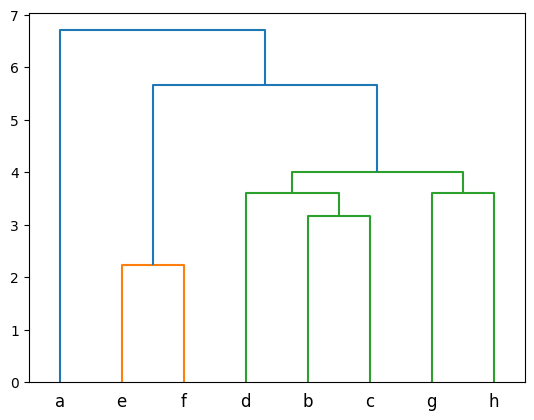

In [ ]:
# Importar las librerías necesarias

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Calcular el dendrograma y guardarlo en la variable W
dendo = hierarchy.linkage(distancias, 'single')

# Hacer el gráfico del dendrograma
fig, ax=plt.subplots()
hierarchy.dendrogram(dendo,labels=datos["etiqueta"].values.tolist())
fig.show()


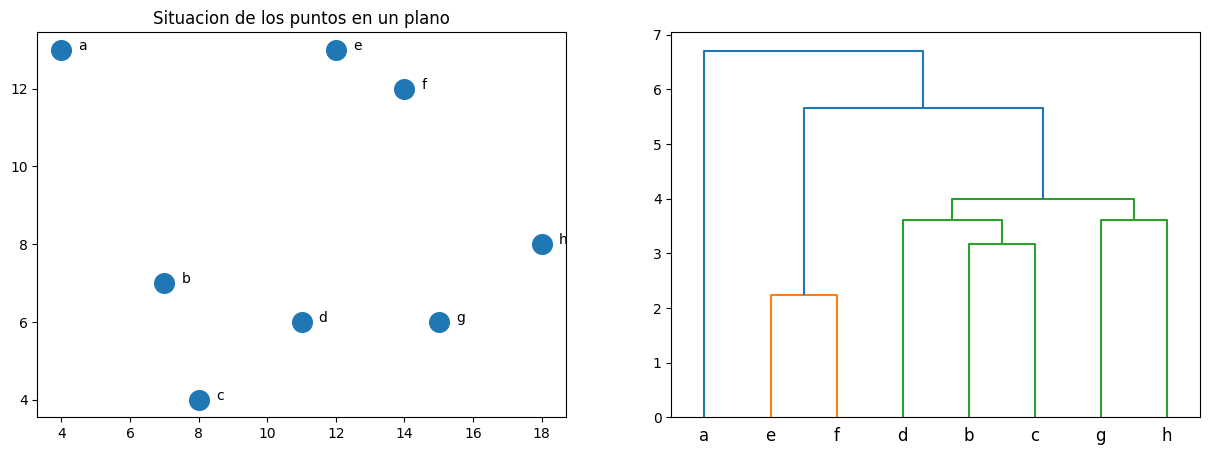

In [ ]:
# Representar conjuntamente el gráfico de las observaciones y el dendrograma

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15, 5))

# Hacer el gráfico xy
ax1.scatter(datos['x1'],datos['x2'],s=200)

# Añadir las etiquetas de los puntos al gráfico xy
for i in range(len(datos['x1'])):
    ax1.annotate(datos['etiqueta'][i],(datos['x1'][i],datos['x2'][i]),
      xytext=(datos['x1'][i]+0.5,datos['x2'][i]))

# Hacer el dendrograma
ax2=hierarchy.dendrogram(dendo,labels=datos["etiqueta"].values.tolist())

# Añadir el título del gráfico xy
ax1.set_title('Situacion de los puntos en un plano')

plt.show()


# Otros conjuntos de datos

Para practicar con más ejemplos, se muestra a continuación una forma de simular sencillos datsets




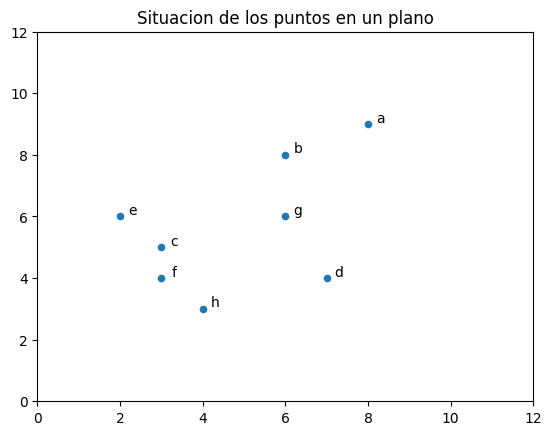

In [ ]:
# Definir el dataset X de forma aleatoria

# Simulación de un np.array de 8 observaciones y dos dimensiones
X=np.random.randint(2,10,(8,2))
etiquetas=['a','b','c','d','e','f','g','h'] # Identificación observaciones

# Hacer un gráfico XY para representar los puntos
def grafico_plano(x,y,z):
    fig, ax = plt.subplots()
    ax.scatter(x, y,s=20)
    for i in range(8):
      ax.text(x[i]+0.3,y[i]+0.2, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)
    ax.set_title('Situacion de los puntos en un plano')
    fig.show()

grafico_plano(X[:,0],X[:,1],etiquetas)

